[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


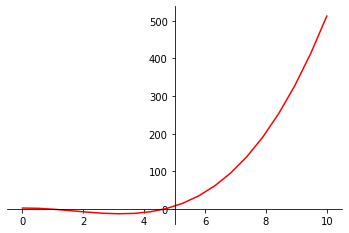

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from random import Random


# 100 linearly spaced numbers
a = np.linspace(0,10,20)
print(a)

# the function
f = a**3 - 5*a**2 + a + 2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(a,f, 'r')

# show the plot
plt.show()

In [47]:

ten_simulated_tr_sets =[]
input = []
simulated = []
for i in range(10):
    # Generate 15 random values of x uniformly distributed in the (0, 10)
    data_set = np.random.uniform(0,10,15)
    x = np.array(data_set)
    input.append(x)
    #print("x values",x)
    #print("")


    # the function
    f = (x**3) - 5*(x**2) + x + 2
    #print("f values",f)
    #print("")

    # Generate random 15 samples from the normal distribution
    mu, sigma = 0, 2.0 # mean and standard deviation
    error = np.random.normal(mu, sigma, 15)
    e = np.array(error)
    #print("e values",e)
    #print("")

    # add f + e to get the response
    response = f + e
    simulated.append(response)
    #print("response values",response)
    
    ten_simulated_tr_sets.append(simulated)
    simulated = []
    
input = np.array(input)
ten_simulated_tr_sets = np.array(ten_simulated_tr_sets)
print(type(input))
print(len(ten_simulated_tr_sets))
#print(ten_simulated_tr_sets)

<class 'numpy.ndarray'>
10


##
## Fit five models to each of the 10 training sets

feature_names  ['1', 'x0']


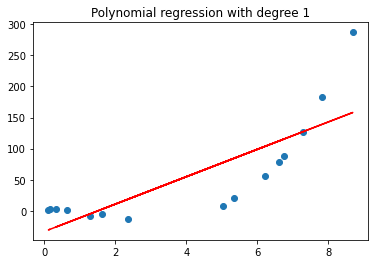

feature_names  ['1', 'x0', 'x0^2']


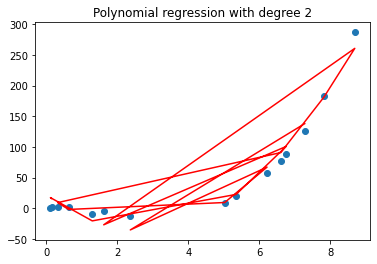

feature_names  ['1', 'x0', 'x0^2', 'x0^3']


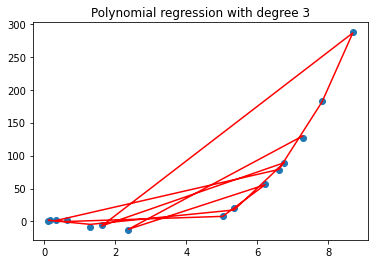

feature_names  ['1', 'x0', 'x0^2', 'x0^3', 'x0^4']


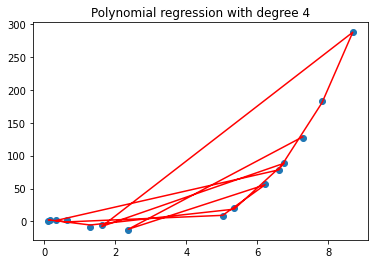

feature_names  ['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']


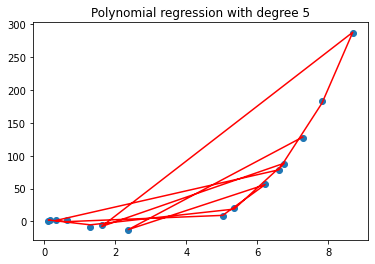

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# creating the model

# loop over 5 models
for i in range(5):
    
    X = np.array(input[0]).reshape(-1, 1)
    Y = np.array(ten_simulated_tr_sets[0]).reshape(-1, 1)

    degree= i +1
    poly = PolynomialFeatures(degree)
    polyreg=make_pipeline(poly,LinearRegression())
    polyreg.fit(X,Y)

    feature_names = poly.get_feature_names()
    print("feature_names ",feature_names)

    # creating a plot
    plt.figure()
    plt.scatter(X,Y)
    plt.plot(X ,polyreg.predict(X),color="red")
    plt.title("Polynomial regression with degree "+str(degree))
    plt.show()